# Moonshot backtest and tear sheet with `up_minus_down.py` algo

*This example notebook is part of QuantRocket's [Getting Started with Equities](https://www.quantrocket.com/tutorials/equities/) tutorial series.*

*The notebook assumes that you've already created a historical price database called "demo-stocks-1d". Please refer to the tutorial series if you haven't completed this step.*

This notebook shows how to run a Moonshot backtest using QuantRocket then analyze the backtests results inside the notebook using Moonchart.

In [1]:
from quantrocket.moonshot import backtest
import moonchart
import io

## Step 1: Run the backtest
First, run the backtest and save the CSV to an in-memory file (using `io.StringIO`):

In [2]:
f = io.StringIO()
backtest("umd-demo", start_date="2010-01-01", csv=True, filepath_or_buffer=f)

## Step 2: Create Tear Sheet
You can Moonchart, an open-source companion package to Moonshot, to create a performance tear sheet:

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


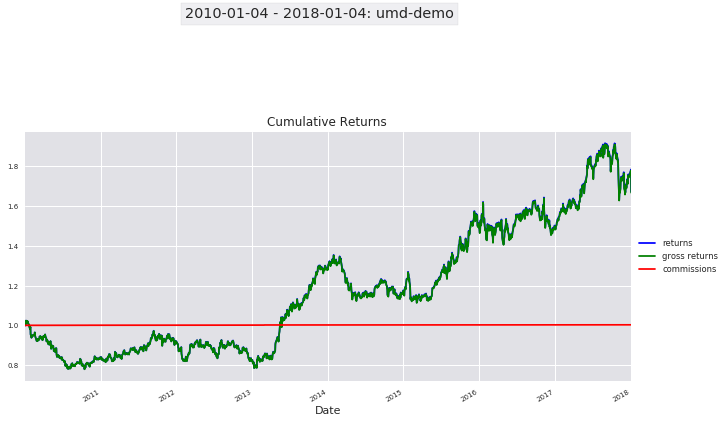

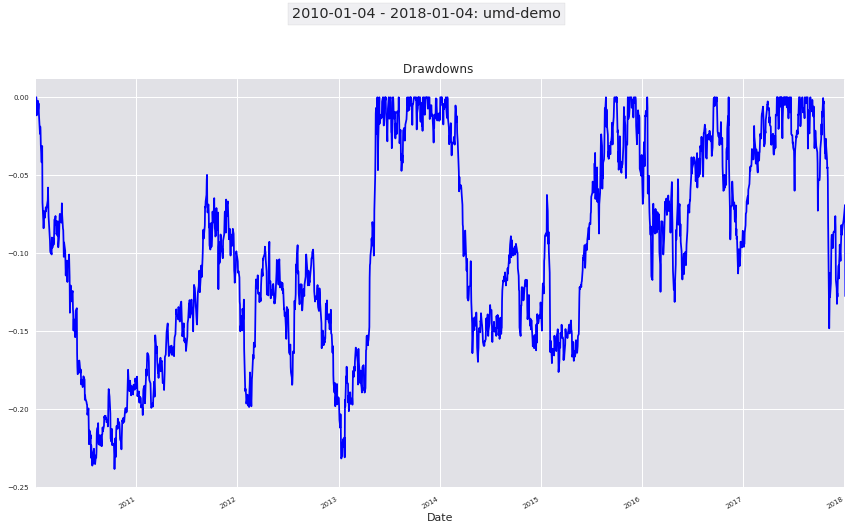

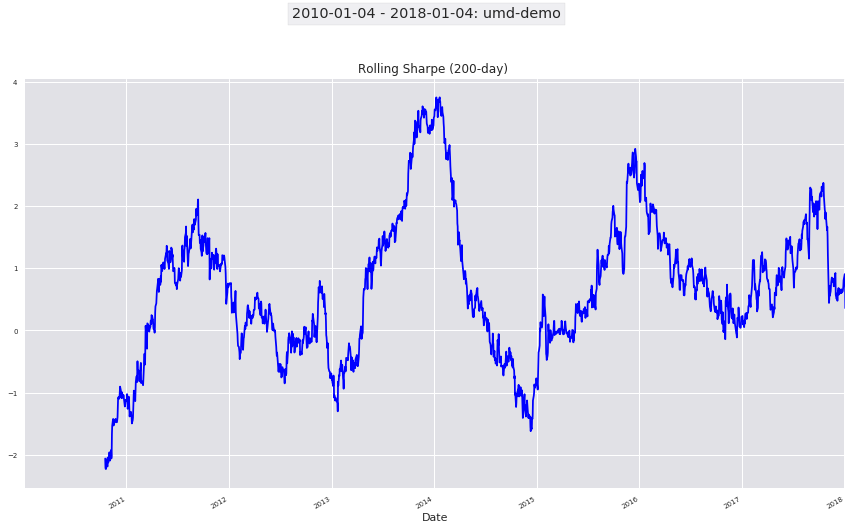

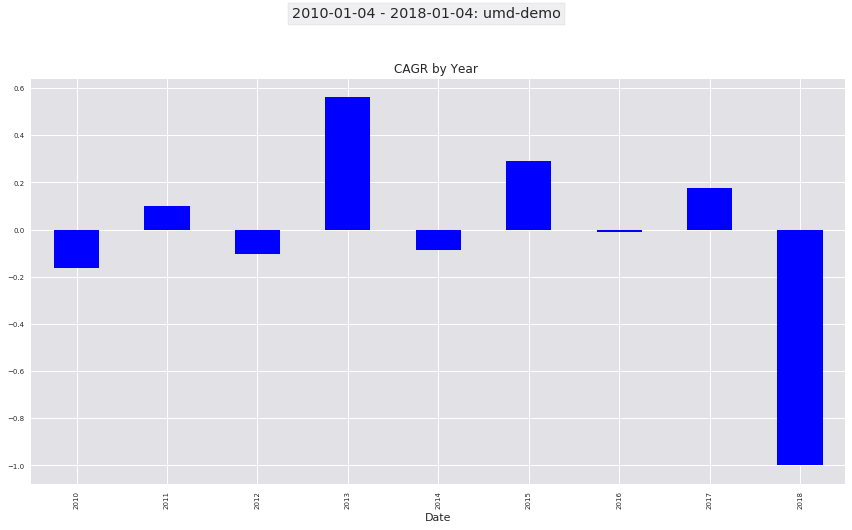

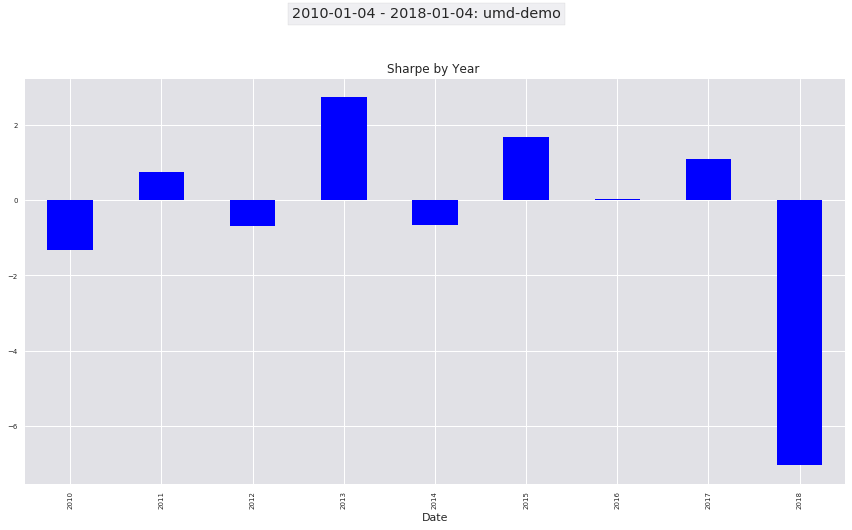

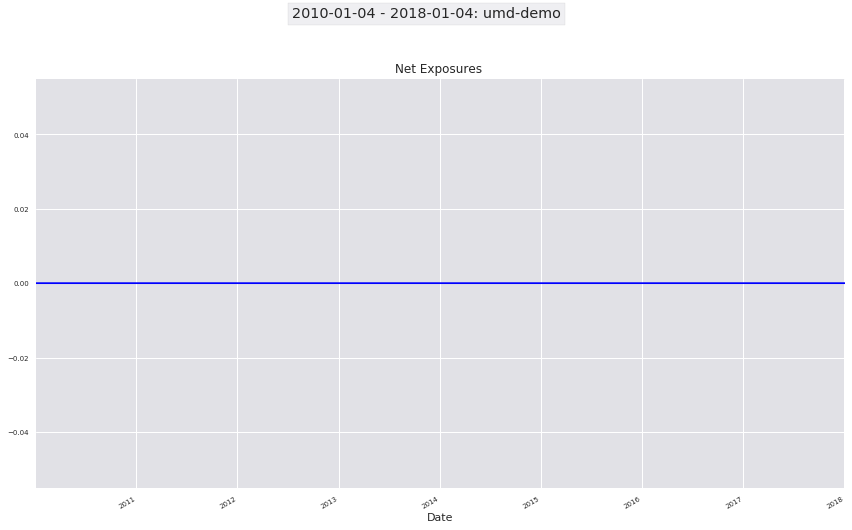

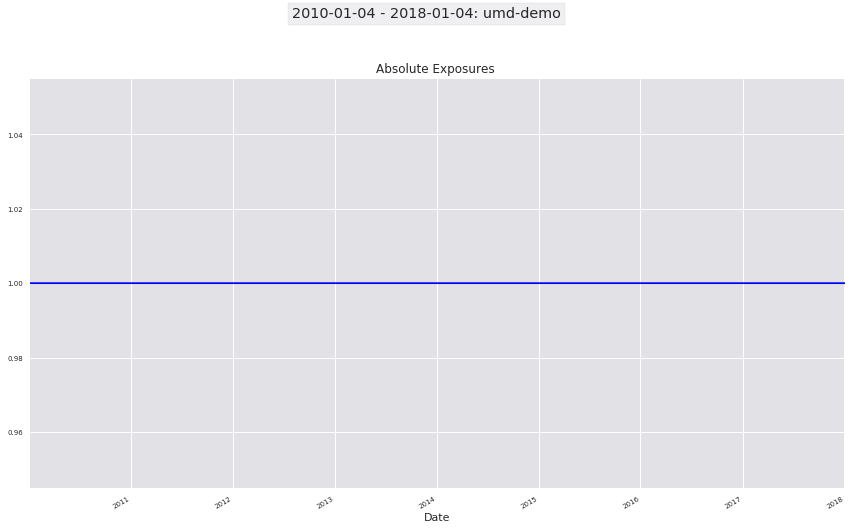

In [3]:
tearsheet = moonchart.Tearsheet()
tearsheet.from_moonshot_csv(f)

## Optional: Analyze your backtest results  
If you want to explore the Moonshot backtest results directly, you can do that as well: 

In [4]:
import pandas as pd
# Since the tear sheet already read the file, we need to seek back to the beginning
f.seek(0)
results = pd.read_csv(f, parse_dates=["Date"], index_col=["Field","Date"])

In [5]:
print("Available fields:", ", ".join(results.index.get_level_values(0).unique()))

Available fields: AbsExposure, AbsWeights, Commission, NetExposure, Return


In [6]:
print(results.loc["Return"].head())

            umd-demo
Date                
2010-01-04  0.001861
2010-01-05  0.006291
2010-01-06  0.015832
2010-01-07 -0.011583
2010-01-08  0.005346
